In [1]:
import pandas as pd

In [2]:
df = (
    pd.read_csv("data/facebook/reaction_counts.csv")
    .assign(status_published=lambda df: pd.to_datetime(df["status_published"]))
    .loc[lambda df: df["status_type"] != "event"]
    .loc[lambda df: ~((df["status_message"].isna()) & (df["status_type"] == "status"))]
)

<AxesSubplot:title={'center':'Trump Facebook Comments By Status Type'}, xlabel='status_type'>

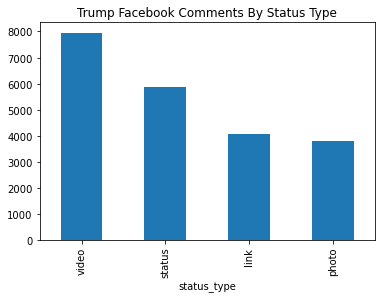

In [3]:
(
    df.groupby("status_type")["num_comments"]
    .mean()
    .sort_values(ascending=False)
    .plot.bar(title="Trump Facebook Comments By Status Type")
)

In [4]:
reactions = [
    'num_reactions',
    'num_likes',
    'num_loves',
    'num_wows', 
    'num_hahas',
    'num_sads',
    'num_angrys'
]

In [5]:
df.columns

Index(['status_id', 'status_message', 'link_name', 'status_type',
       'status_link', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys'],
      dtype='object')

<AxesSubplot:title={'center':'Trump Facebook Reactions By Status Type'}, xlabel='status_type'>

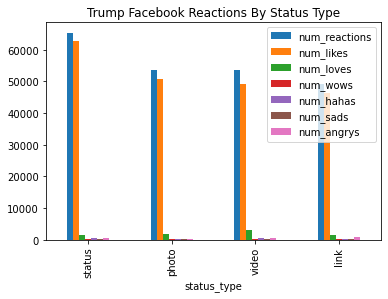

In [6]:
(
    df.groupby("status_type")[reactions]
    .mean()
    .sort_values("num_reactions", ascending=False)
    .plot.bar(title="Trump Facebook Reactions By Status Type")
)

<AxesSubplot:xlabel='status_published'>

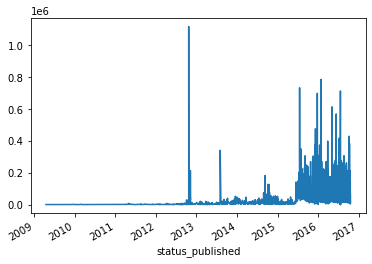

In [7]:
df.set_index("status_published")["num_likes"].sort_index().plot()